In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)

In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train

array([3, 7, 8, ..., 5, 8, 5])

In [7]:
X_train[:, 0].shape

(784,)

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [9]:
def ReLU(Z):
    return np.maximum(Z, 0)
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [10]:
def fr_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0

def b_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot(Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [11]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)  / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = fr_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = b_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration : ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [12]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration :  0
[1 9 9 ... 9 0 9] [3 7 8 ... 5 8 5]
0.11553658536585366
Iteration :  10
[1 3 8 ... 3 0 9] [3 7 8 ... 5 8 5]
0.17109756097560977
Iteration :  20
[6 3 8 ... 3 0 3] [3 7 8 ... 5 8 5]
0.24892682926829268
Iteration :  30
[6 3 8 ... 3 0 5] [3 7 8 ... 5 8 5]
0.3205121951219512
Iteration :  40
[6 7 8 ... 3 3 5] [3 7 8 ... 5 8 5]
0.38565853658536586
Iteration :  50
[2 7 8 ... 3 3 5] [3 7 8 ... 5 8 5]
0.4373170731707317
Iteration :  60
[2 7 8 ... 3 2 5] [3 7 8 ... 5 8 5]
0.47617073170731705
Iteration :  70
[2 7 8 ... 3 6 5] [3 7 8 ... 5 8 5]
0.5155853658536586
Iteration :  80
[2 7 8 ... 3 6 5] [3 7 8 ... 5 8 5]
0.5469756097560976
Iteration :  90
[2 7 8 ... 3 6 5] [3 7 8 ... 5 8 5]
0.573390243902439
Iteration :  100
[2 7 8 ... 3 6 5] [3 7 8 ... 5 8 5]
0.5976829268292683
Iteration :  110
[2 7 8 ... 3 6 5] [3 7 8 ... 5 8 5]
0.6189268292682927
Iteration :  120
[2 7 8 ... 3 6 5] [3 7 8 ... 5 8 5]
0.6389268292682927
Iteration :  130
[2 7 8 ... 3 6 5] [3 7 8 ... 5 8 5]
0.6543170731707317

In [13]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = fr_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  3


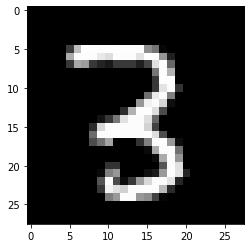

Prediction:  [7]
Label:  7


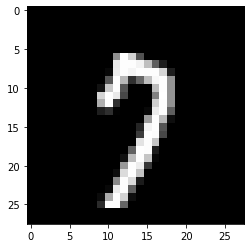

Prediction:  [8]
Label:  8


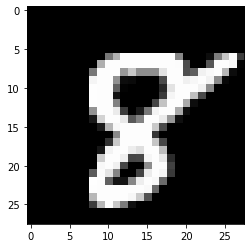

Prediction:  [7]
Label:  7


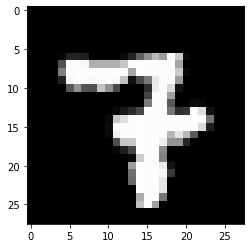

In [14]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [15]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 6 5 7 0 6 7 7 4 2 2 9 9 8 9 9 3 7 9 9 4 9 1 6 2 7 3 8 8 8 7 3 4 1 9 6 4
 0 9 7 0 8 6 6 2 2 1 2 2 0 4 7 1 4 9 4 2 2 3 2 7 8 8 4 3 0 2 8 9 2 3 5 0 5
 1 0 3 5 1 9 1 0 2 9 4 1 3 5 0 9 1 0 5 6 3 0 1 8 3 1 3 4 7 9 0 1 6 6 9 8 7
 2 8 9 9 3 8 9 8 1 2 1 1 9 5 2 2 2 4 6 8 6 0 1 5 6 8 0 7 9 3 9 7 9 0 8 7 7
 3 1 2 4 3 8 1 9 4 1 8 8 7 9 1 6 9 7 3 2 5 1 2 4 8 7 7 5 6 8 7 1 9 1 6 6 1
 1 3 6 4 7 9 5 4 3 3 0 9 7 0 9 5 9 6 2 8 4 4 7 5 6 4 6 1 6 6 6 9 5 7 1 6 6
 4 7 5 8 8 4 6 7 8 5 8 3 6 8 2 0 7 3 8 9 8 4 1 5 0 3 7 1 4 2 1 6 1 3 1 6 3
 1 9 0 3 8 5 7 2 9 1 0 7 9 6 5 6 7 7 2 0 4 8 8 7 7 0 9 6 0 4 3 8 8 8 8 9 4
 7 3 1 6 6 0 6 6 6 2 4 8 7 3 1 9 7 4 9 5 5 9 1 0 1 2 1 9 1 0 7 8 6 4 2 1 9
 0 0 6 5 8 6 8 7 9 1 3 9 4 9 0 6 8 2 7 2 5 0 9 8 5 1 8 9 5 1 7 1 2 1 1 1 1
 6 6 2 2 1 9 1 4 1 7 1 6 9 2 9 8 1 3 9 0 4 6 6 1 1 4 4 7 0 6 5 1 7 8 3 0 7
 0 2 1 7 3 0 0 7 1 0 7 9 7 9 7 1 6 4 9 8 6 6 5 1 5 8 3 9 8 9 0 2 5 9 7 5 3
 4 9 3 0 7 2 2 9 7 7 7 7 0 3 3 9 4 0 8 4 7 4 5 1 6 2 2 9 8 7 3 3 4 3 0 1 1
 4 1 0 9 0 0 1 6 6 3 7 8 

0.842